Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\bruno.pereira.silva\AppData\Local\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\bruno.pereira.silva\AppData\Local\Temp\ipykernel_18956\2575159428.py", line 1075, in abrir_janela_dash3
    self.dash1.mainloop()
    ^^^^^^^^^^
AttributeError: 'Application' object has no attribute 'dash1'


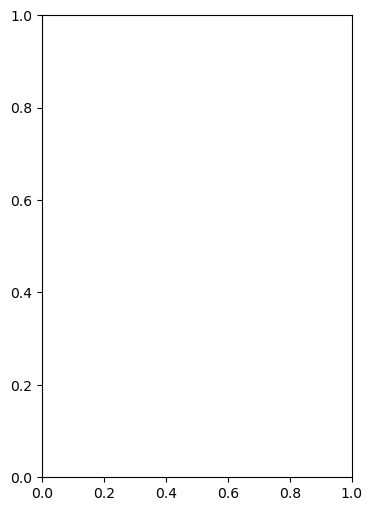

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import *
from tkinter import ttk
from tkinter.ttk import Combobox
from tkinter import filedialog, messagebox, simpledialog
from PIL import ImageTk, Image
from PIL import ImageGrab
import os

class Application(Frame):
    def __init__(self,master=None):
        super().__init__(master)
        self.master = master
        self.master.title("Análise de Dados")
        self.create_widgets()
        self.master.columnconfigure(1,weight=1)

    def create_widgets(self):
        self.menu_bar = Menu(self.master)
        self.master.config(menu=self.menu_bar)
        self.arquivo_menu = Menu(self.menu_bar)
        self.menu_bar.add_cascade(label="Arquivo",menu=self.arquivo_menu)
        self.arquivo_menu.add_command(label="Abrir",command=self.abrir_arquivo)
        self.arquivo_menu.add_command(label="Sair",command=self.master.destroy)

        self.frame_relatorios = Frame(self.master)
        self.frame_relatorios.grid(row=0,column=0,columnspan=2,padx=10,pady=10,sticky="nsew")

        self.btn_dash1 = Button(self.frame_relatorios,text="Dashboard 1", 
                                font=("Arial",16),command=self.abrir_janela_dash1)
        self.btn_dash1.grid(row=0,column=0,padx=10,pady=10,
                            sticky="nsew")
        
        self.btn_dash2 = Button(self.frame_relatorios,text="Dashboard 2", 
                                font=("Arial",16),command=self.abrir_janela_dash2)
        self.btn_dash2.grid(row=0,column=1,padx=10,pady=10,
                            sticky="nsew")
        
        self.btn_dash2 = Button(self.frame_relatorios,text="Dashboard 3", 
                                font=("Arial",16),command=self.abrir_janela_dash3)
        self.btn_dash2.grid(row=0,column=2,padx=10,pady=10,
                            sticky="nsew")
        
        self.btn_editar_dados = Button(self.frame_relatorios,text="Editar Dados", 
                                font=("Arial",16),command=self.abrir_janela_editar_dados)
        self.btn_editar_dados.grid(row=0,column=3,padx=10,pady=10,
                            sticky="nsew")
        
        self.frame_botoes = Frame(self.master)
        self.frame_botoes.grid(row=1,column=0,padx=10,pady=10,sticky=N+S)

        self.btn_colunas = Button(self.frame_botoes,text="Gráfico de Colunas", 
                                font=("Arial",16),
                                command=self.abrir_janela_colunas)
        self.btn_colunas.grid(row=1,column=0,padx=10,pady=10,
                            sticky="nsew")
        
        self.btn_pizza = Button(self.frame_botoes,text="Gráfico de Pizza", 
                                font=("Arial",16),
                                command=self.abrir_janela_pizza)
        self.btn_pizza.grid(row=2,column=0,padx=10,pady=10,
                            sticky="nsew")
        
        self.btn_linha = Button(self.frame_botoes,text="Gráfico de Linha", 
                                font=("Arial",16),command=self.abrir_janela_linha)
        self.btn_linha.grid(row=3,column=0,padx=10,pady=10,
                            sticky="nsew")
        
        self.btn_area = Button(self.frame_botoes,text="Gráfico de Área", 
                                font=("Arial",16),command=self.abrir_janela_area)
        self.btn_area.grid(row=4,column=0,padx=10,pady=10,
                            sticky="nsew")
                
        self.btn_funil = Button(self.frame_botoes,text="Gráfico de Funil", 
                                font=("Arial",16),command=self.abrir_janela_funil)
        self.btn_funil.grid(row=5,column=0,padx=10,pady=10,
                            sticky="nsew")
        
        self.fig = plt.figure(figsize=(4,6),dpi=100)
        
        self.ax = self.fig.add_subplot(111)

        self.canvas = FigureCanvasTkAgg(self.fig,master=self.master)
        self.canvas.get_tk_widget().grid(row=1,column=1,padx=10,pady=10,stick=N+S+E+W)

    def abrir_arquivo(self):
        caminho_arquivo = filedialog.askopenfilename(defaultextension=".xlsx",
                                                    filetypes=[("Excel file","*.xlsx")])
        
        if caminho_arquivo:
            try:
                self.df = pd.read_excel(caminho_arquivo)
                messagebox.showinfo("Sucesso","Arquivo aberto com sucesso!")
        
            except Exception as e:
                messagebox.showerror("Erro",f"Não foi possível abrir o arquivo: {e}")
    
    def abrir_janela_colunas(self):
        self.janela_colunas = Toplevel(self.master)
        self.janela_colunas.title("Gráfico Colunas")
        self.janela_colunas.geometry("500x500")
        self.janela_colunas.grab_set()

        self.lb_eixo_x = Label(self.janela_colunas,
                            text=("Eixo X: "),
                            font=("Arial",22))
        self.lb_eixo_x.pack(pady=5)        
        self.cb_eixo_x = Combobox(self.janela_colunas,
                                values=self.df.columns.to_list(),
                                font=("Arial",22)
                                )
        self.cb_eixo_x.pack(pady=5)

        self.lb_eixo_y = Label(self.janela_colunas,
                            text=("Eixo Y: "),
                            font=("Arial",22))
        self.lb_eixo_y.pack(pady=5)        
        self.cb_eixo_y = Combobox(self.janela_colunas,
                                values=self.df.columns.to_list(),
                                font=("Arial",22))
        self.cb_eixo_y.pack(pady=5)
        
        self.lb_titulo = Label(self.janela_colunas,
                            text=("Título: "),
                            font=("Arial",22))
        self.lb_titulo.pack(pady=5)        
        self.en_titulo = Entry(self.janela_colunas,
                                font=("Arial",22))
        self.en_titulo.pack(pady=5)

        self.lb_imagem = Label(self.janela_colunas,
                            text=("Imagem: "),
                            font=("Arial",22))
        self.lb_imagem.pack(pady=5)        
        self.cb_imagem = Combobox(self.janela_colunas,
                                values=["image1","image2","image3","image4",
                                        "image5","image6","image7","image8"],
                                        font=("Arial",22))
        self.cb_imagem.pack(pady=5)

        self.btn_gerar_grafico_colunas1 = Button(self.janela_colunas,
                                                text="Gráfico 1",
                                                font=("Arial",26),
                                                command=self.gerar_grafico_colunas)
        self.btn_gerar_grafico_colunas1.pack(side=LEFT,padx=5,pady=5)
        
        self.btn_gerar_grafico_colunas2 = Button(self.janela_colunas,
                                                text="Gráfico 2",
                                                font=("Arial",26),
                                                command=self.gerar_grafico_colunas_2)
        self.btn_gerar_grafico_colunas2.pack(side=LEFT,padx=5,pady=5)

    def gerar_grafico_colunas(self):
        self.ax.clear()

        col_x = self.cb_eixo_x.get()
        col_y = self.cb_eixo_y.get()

        df_agrupado = self.df.groupby(col_x).sum()[col_y]

        titulo_grafico = self.en_titulo.get()

        self.ax.bar(df_agrupado.index,df_agrupado.values)
        self.ax.set_xlabel(col_x)
        self.ax.set_ylabel(col_y)
        self.ax.set_title(titulo_grafico)

        for i,v in enumerate(df_agrupado.values):
            self.ax.annotate("{:,.0f}".format(v),xy=(i,v),ha="center",va="bottom")
        
        #self.ax.set_xticks(range(len(df_agrupado.index)))
        #self.ax.set_xticklabels(df_agrupado.index,rotation=45,ha="right")

        self.ax.xaxis.set_label_text("")
        self.ax.xaxis.get_label().set_visible(False)

        self.ax.yaxis.set_label_text("")
        self.ax.yaxis.get_label().set_visible(False)

        #Expande as laterais para que o grafico ocupe toda a area
        self.fig.tight_layout()

        self.canvas.draw()

        nome_imagem = self.cb_imagem.get()
        caminho_nome_imagem = f"{nome_imagem}.png"

        caminha_imagem = os.path.join(os.getcwd(),caminho_nome_imagem)

        self.ax.figure.savefig(caminha_imagem,dpi=80)

        self.janela_colunas.destroy()

    def gerar_grafico_colunas_2(self):
        self.ax.clear()

        col_x = self.cb_eixo_x.get()
        col_y = self.cb_eixo_y.get()

        df_agrupado = self.df.groupby(col_x).sum()[col_y]

        titulo_grafico = self.en_titulo.get()

        self.ax.bar(df_agrupado.index,df_agrupado.values)
        self.ax.set_xlabel(col_x)
        self.ax.set_ylabel(col_y)
        self.ax.set_title(titulo_grafico)
        self.ax.set_xticks(range(len(df_agrupado.index)))
        self.ax.set_xticklabels(df_agrupado.index,rotation=45,ha="right")
        self.ax.grid(True,axis=Y)
        self.ax.figure.set_size_inches(10,6)

        for i,v in enumerate(df_agrupado.values):
            self.ax.annotate("{:,.0f}".format(v),xy=(i,v),ha="center",va="bottom")
            
        self.ax.xaxis.set_label_text("")
        self.ax.xaxis.get_label().set_visible(False)

        self.ax.yaxis.set_label_text("")
        self.ax.yaxis.get_label().set_visible(False)

        #Expande as laterais para que o grafico ocupe toda a area
        self.fig.tight_layout()
        
        self.canvas.draw()

        nome_imagem = self.cb_imagem.get()
        caminho_nome_imagem = f"{nome_imagem}.png"

        caminha_imagem = os.path.join(os.getcwd(),caminho_nome_imagem)

        self.ax.figure.savefig(caminha_imagem,dpi=80)

        self.janela_colunas.destroy()

    def abrir_janela_pizza(self):
        self.janela_pizza = Toplevel(self.master)
        self.janela_pizza.title("Gráfico Pizza")
        self.janela_pizza.geometry("500x500")
        self.janela_pizza.grab_set()

        self.lb_eixo_x = Label(self.janela_pizza,
                            text=("Eixo X: "),
                            font=("Arial",22))
        self.lb_eixo_x.pack(pady=5)        
        self.cb_eixo_x = Combobox(self.janela_pizza,
                                values=self.df.columns.to_list(),
                                font=("Arial",22)
                                )
        self.cb_eixo_x.pack(pady=5)

        self.lb_eixo_y = Label(self.janela_pizza,
                            text=("Eixo Y: "),
                            font=("Arial",22))
        self.lb_eixo_y.pack(pady=5)        
        self.cb_eixo_y = Combobox(self.janela_pizza,
                                values=self.df.columns.to_list(),
                                font=("Arial",22))
        self.cb_eixo_y.pack(pady=5)
        
        self.lb_titulo = Label(self.janela_pizza,
                            text=("Título: "),
                            font=("Arial",22))
        self.lb_titulo.pack(pady=5)        
        self.en_titulo = Entry(self.janela_pizza,
                                font=("Arial",22))
        self.en_titulo.pack(pady=5)

        self.lb_imagem = Label(self.janela_pizza,
                            text=("Imagem: "),
                            font=("Arial",22))
        self.lb_imagem.pack(pady=5)        
        self.cb_imagem = Combobox(self.janela_pizza,
                                values=["image1","image2","image3","image4",
                                        "image5","image6","image7","image8"],
                                        font=("Arial",22))
        self.cb_imagem.pack(pady=5)

        self.btn_gerar_grafico_1 = Button(self.janela_pizza,
                                                text="Gráfico 1",
                                                font=("Arial",26),
                                                command=self.gerar_grafico_pizza)
        self.btn_gerar_grafico_1.pack(side=LEFT,padx=5,pady=5)
        
        self.btn_gerar_grafico_2 = Button(self.janela_pizza,
                                                text="Gráfico 2",
                                                font=("Arial",26),
                                                command=self.gerar_grafico_pizza_2)
        self.btn_gerar_grafico_2.pack(side=LEFT,padx=5,pady=5)

    def gerar_grafico_pizza(self):
        self.ax.clear()

        col_x = self.cb_eixo_x.get()
        col_y = self.cb_eixo_y.get()

        df_agrupado = self.df.groupby(col_x).sum()[col_y]

        titulo_grafico = self.en_titulo.get()

        total = df_agrupado.sum()
        pedacos = [(v / total) * 100 for v in df_agrupado.values] 

        self.ax.pie(df_agrupado.values,labels=[f"{label} ({pedaco:.1f}%)"
                                                for label,pedaco in zip(df_agrupado.index,pedacos)])
        self.ax.set_title(titulo_grafico)

        for i,v in enumerate(df_agrupado.values):
            self.ax.annotate("{:,.0f}".format(v),xy=(i,v),ha="center",va="bottom")
        
        #self.ax.set_xticks(range(len(df_agrupado.index)))
        #self.ax.set_xticklabels(df_agrupado.index,rotation=45,ha="right")

        self.canvas.draw()

        nome_imagem = self.cb_imagem.get()
        caminho_nome_imagem = f"{nome_imagem}.png"

        caminha_imagem = os.path.join(os.getcwd(),caminho_nome_imagem)

        self.ax.figure.savefig(caminha_imagem,dpi=80)

        self.janela_pizza.destroy()
    
    def gerar_grafico_pizza_2(self):
        self.ax.clear()

        col_x = self.cb_eixo_x.get()
        col_y = self.cb_eixo_y.get()

        df_agrupado = self.df.groupby(col_x).sum()[col_y]

        titulo_grafico = self.en_titulo.get()

        total = df_agrupado.sum()
        #pedacos = [(v / total) * 100 for v in df_agrupado.values] 

        self.ax.pie(df_agrupado.values,labels=[f"{label} ({valor:.0f}%)"
                                                for label,valor in 
                                                zip(df_agrupado.index,
                                                    df_agrupado.values)],
                                                    autopct="%1.0f%%")
        self.ax.set_title(titulo_grafico)

        for i,v in enumerate(df_agrupado.values):
            self.ax.annotate("{:,.0f}".format(v),xy=(i,v),ha="center",va="bottom")
        
        #self.ax.set_xticks(range(len(df_agrupado.index)))
        #self.ax.set_xticklabels(df_agrupado.index,rotation=45,ha="right")

        self.canvas.draw()

        nome_imagem = self.cb_imagem.get()
        caminho_nome_imagem = f"{nome_imagem}.png"

        caminha_imagem = os.path.join(os.getcwd(),caminho_nome_imagem)

        self.ax.figure.savefig(caminha_imagem,dpi=80)

        self.janela_pizza.destroy()

    def abrir_janela_linha(self):
        self.janela_linha = Toplevel(self.master)
        self.janela_linha.title("Gráfico Linha")
        self.janela_linha.geometry("500x500")
        self.janela_linha.grab_set()

        self.lb_eixo_x = Label(self.janela_linha,
                            text=("Eixo X: "),
                            font=("Arial",22))
        self.lb_eixo_x.pack(pady=5)        
        self.cb_eixo_x = Combobox(self.janela_linha,
                                values=self.df.columns.to_list(),
                                font=("Arial",22)
                                )
        self.cb_eixo_x.pack(pady=5)

        self.lb_eixo_y = Label(self.janela_linha,
                            text=("Eixo Y: "),
                            font=("Arial",22))
        self.lb_eixo_y.pack(pady=5)        
        self.cb_eixo_y = Combobox(self.janela_linha,
                                values=self.df.columns.to_list(),
                                font=("Arial",22))
        self.cb_eixo_y.pack(pady=5)
        
        self.lb_titulo = Label(self.janela_linha,
                            text=("Título: "),
                            font=("Arial",22))
        self.lb_titulo.pack(pady=5)        
        self.en_titulo = Entry(self.janela_linha,
                                font=("Arial",22))
        self.en_titulo.pack(pady=5)

        self.lb_imagem = Label(self.janela_linha,
                            text=("Imagem: "),
                            font=("Arial",22))
        self.lb_imagem.pack(pady=5)        
        self.cb_imagem = Combobox(self.janela_linha,
                                values=["image1","image2","image3","image4",
                                        "image5","image6","image7","image8"],
                                        font=("Arial",22))
        self.cb_imagem.pack(pady=5)

        self.btn_gerar_grafico_1 = Button(self.janela_linha,
                                                text="Gráfico 1",
                                                font=("Arial",26),
                                                command=self.gerar_grafico_linha)
        self.btn_gerar_grafico_1.pack(side=LEFT,padx=5,pady=5)
        
        self.btn_gerar_grafico_2 = Button(self.janela_linha,
                                                text="Gráfico 2",
                                                font=("Arial",26),
                                                command=self.gerar_grafico_linha_2)
        self.btn_gerar_grafico_2.pack(side=LEFT,padx=5,pady=5)

    def gerar_grafico_linha(self):
        self.ax.clear()

        col_x = self.cb_eixo_x.get()
        col_y = self.cb_eixo_y.get()

        df_agrupado = self.df.groupby(col_x).sum()[col_y]

        titulo_grafico = self.en_titulo.get()

        self.ax.plot(df_agrupado.index,df_agrupado.values)
        self.ax.set_xlabel(col_x)
        self.ax.set_ylabel(col_y)
        self.ax.set_title(titulo_grafico)

        for i,v in enumerate(df_agrupado.values):
            self.ax.annotate("{:,.0f}".format(v),
                            xy=(df_agrupado.index[i],df_agrupado.values[i]),
                            ha="center",va="bottom")
        
        #self.ax.set_xticks(range(len(df_agrupado.index)))
        #self.ax.set_xticklabels(df_agrupado.index,rotation=45,ha="right")

        self.ax.xaxis.set_label_text("")
        self.ax.xaxis.get_label().set_visible(False)

        self.ax.yaxis.set_label_text("")
        self.ax.yaxis.get_label().set_visible(False)
        
        #Expande as laterais para que o grafico ocupe toda a area
        self.fig.tight_layout()

        self.canvas.draw()

        nome_imagem = self.cb_imagem.get()
        caminho_nome_imagem = f"{nome_imagem}.png"

        caminha_imagem = os.path.join(os.getcwd(),caminho_nome_imagem)

        self.ax.figure.savefig(caminha_imagem,dpi=80)

        self.janela_linha.destroy()

    def gerar_grafico_linha_2(self):
        self.ax.clear()

        col_x = self.cb_eixo_x.get()
        col_y = self.cb_eixo_y.get()

        df_agrupado = self.df.groupby(col_x).sum()[col_y]

        titulo_grafico = self.en_titulo.get()

        self.ax.plot(df_agrupado.index,df_agrupado.values,
                    '-o',color="mediumseagreen",
                    linewidth=2,markersize=8)
        self.ax.set_xlabel(col_x)
        self.ax.set_ylabel(col_y)
        self.ax.set_title(titulo_grafico)
        self.ax.set_xticks(range(len(df_agrupado.index)))
        self.ax.set_xticklabels(df_agrupado.index,rotation=45,ha="right")
        self.ax.grid(True,axis=Y)
        self.ax.figure.set_size_inches(10,6)

        for i,v in enumerate(df_agrupado.values):
            valor_formatado = "{:,.0f}".format(v)
            self.ax.annotate(valor_formatado,
                            xy=(df_agrupado.index[i],df_agrupado.values[i]),
                            ha="center",va="bottom",
                            fontsize=10)
        
        self.ax.set_facecolor("white")
        self.ax.grid(color='lightgray',linestyle="-",linewidth=0.5)

        self.ax.set_xticks(range(len(df_agrupado.index)))
        self.ax.set_xticklabels(df_agrupado.index,rotation=40)   

        self.ax.xaxis.set_label_text("")
        self.ax.xaxis.get_label().set_visible(False)

        self.ax.yaxis.set_label_text("")
        self.ax.yaxis.get_label().set_visible(False)   

        #Expande as laterais para que o grafico ocupe toda a area
        self.fig.tight_layout()  
            
        self.canvas.draw()

        nome_imagem = self.cb_imagem.get()
        caminho_nome_imagem = f"{nome_imagem}.png"

        caminha_imagem = os.path.join(os.getcwd(),caminho_nome_imagem)

        self.ax.figure.savefig(caminha_imagem,dpi=80)

        self.janela_linha.destroy()

    def abrir_janela_area(self):
        self.janela_area = Toplevel(self.master)
        self.janela_area.title("Gráfico Área")
        self.janela_area.geometry("500x500")
        self.janela_area.grab_set()

        self.lb_eixo_x = Label(self.janela_area,
                            text=("Eixo X: "),
                            font=("Arial",22))
        self.lb_eixo_x.pack(pady=5)        
        self.cb_eixo_x = Combobox(self.janela_area,
                                values=self.df.columns.to_list(),
                                font=("Arial",22)
                                )
        self.cb_eixo_x.pack(pady=5)

        self.lb_eixo_y = Label(self.janela_area,
                            text=("Eixo Y: "),
                            font=("Arial",22))
        self.lb_eixo_y.pack(pady=5)        
        self.cb_eixo_y = Combobox(self.janela_area,
                                values=self.df.columns.to_list(),
                                font=("Arial",22))
        self.cb_eixo_y.pack(pady=5)
        
        self.lb_titulo = Label(self.janela_area,
                            text=("Título: "),
                            font=("Arial",22))
        self.lb_titulo.pack(pady=5)        
        self.en_titulo = Entry(self.janela_area,
                                font=("Arial",22))
        self.en_titulo.pack(pady=5)

        self.lb_imagem = Label(self.janela_area,
                            text=("Imagem: "),
                            font=("Arial",22))
        self.lb_imagem.pack(pady=5)        
        self.cb_imagem = Combobox(self.janela_area,
                                values=["image1","image2","image3","image4",
                                        "image5","image6","image7","image8"],
                                        font=("Arial",22))
        self.cb_imagem.pack(pady=5)

        self.btn_gerar_grafico_1 = Button(self.janela_area,
                                                text="Gráfico 1",
                                                font=("Arial",26),
                                                command=self.gerar_grafico_area)
        self.btn_gerar_grafico_1.pack(side=LEFT,padx=5,pady=5)
        
        self.btn_gerar_grafico_2 = Button(self.janela_area,
                                                text="Gráfico 2",
                                                font=("Arial",26),
                                                command=self.gerar_grafico_area_2)
        self.btn_gerar_grafico_2.pack(side=LEFT,padx=5,pady=5)

    def gerar_grafico_area(self):
        self.ax.clear()

        col_x = self.cb_eixo_x.get()
        col_y = self.cb_eixo_y.get()

        df_agrupado = self.df.groupby(col_x).sum()[col_y]

        titulo_grafico = self.en_titulo.get()

        self.ax.fill_between(df_agrupado.index,
                            df_agrupado.values,
                            color='blue',
                            alpha=0.2)

        self.ax.plot(df_agrupado.index,df_agrupado.values,color='blue')
        self.ax.set_xlabel(col_x)
        self.ax.set_ylabel(col_y)
        self.ax.set_title(titulo_grafico)

        for i,v in enumerate(df_agrupado.values):
            self.ax.annotate("{:,.0f}".format(v),
                            xy=(df_agrupado.index[i],df_agrupado.values[i]),
                            ha="center",va="bottom")
        
        self.ax.set_xticks(range(len(df_agrupado.index)))
        self.ax.set_xticklabels(df_agrupado.index,rotation=40) 

        self.ax.xaxis.set_label_text("")
        self.ax.xaxis.get_label().set_visible(False)

        self.ax.yaxis.set_label_text("")
        self.ax.yaxis.get_label().set_visible(False)
        
        #Expande as laterais para que o grafico ocupe toda a area
        self.fig.tight_layout()

        self.canvas.draw()

        nome_imagem = self.cb_imagem.get()
        caminho_nome_imagem = f"{nome_imagem}.png"

        caminha_imagem = os.path.join(os.getcwd(),caminho_nome_imagem)

        self.ax.figure.savefig(caminha_imagem,dpi=80)

        self.janela_area.destroy()
    
    def gerar_grafico_area_2(self):
        self.ax.clear()

        col_x = self.cb_eixo_x.get()
        col_y = self.cb_eixo_y.get()

        df_agrupado = self.df.groupby(col_x).sum()[col_y]

        titulo_grafico = self.en_titulo.get()

        self.ax.fill_between(df_agrupado.index,
                            df_agrupado.values,
                            color='blue',
                            alpha=0.2,
                            label=col_y)

        self.ax.plot(df_agrupado.index,df_agrupado.values,
                    color='red',
                    label=f"{col_y} (linha)")
        self.ax.set_xlabel(col_x)
        self.ax.set_ylabel("Soma de: "+col_y)
        self.ax.set_title(titulo_grafico)
        self.ax.legend()
        self.ax.grid(True)

        for i,v in enumerate(df_agrupado.values):
            self.ax.annotate("{:,.0f}".format(v),
                            xy=(df_agrupado.index[i],df_agrupado.values[i]),
                            ha="center",va="bottom")
        
        self.ax.set_xticks(range(len(df_agrupado.index)))
        self.ax.set_xticklabels(df_agrupado.index,rotation=40) 
        
        self.ax.xaxis.set_label_text("")
        self.ax.xaxis.get_label().set_visible(False)

        self.ax.yaxis.set_label_text("")
        self.ax.yaxis.get_label().set_visible(False)

        #Expande as laterais para que o grafico ocupe toda a area
        self.fig.tight_layout()

        self.canvas.draw()

        nome_imagem = self.cb_imagem.get()
        caminho_nome_imagem = f"{nome_imagem}.png"

        caminha_imagem = os.path.join(os.getcwd(),caminho_nome_imagem)

        self.ax.figure.savefig(caminha_imagem,dpi=80)

        self.janela_area.destroy()

    def abrir_janela_funil(self):
        self.janela_funil = Toplevel(self.master)
        self.janela_funil.title("Gráfico Funil")
        self.janela_funil.geometry("500x500")
        self.janela_funil.grab_set()

        self.lb_eixo_x = Label(self.janela_funil,
                            text=("Eixo X: "),
                            font=("Arial",22))
        self.lb_eixo_x.pack(pady=5)        
        self.cb_eixo_x = Combobox(self.janela_funil,
                                values=self.df.columns.to_list(),
                                font=("Arial",22)
                                )
        self.cb_eixo_x.pack(pady=5)

        self.lb_eixo_y = Label(self.janela_funil,
                            text=("Eixo Y: "),
                            font=("Arial",22))
        self.lb_eixo_y.pack(pady=5)        
        self.cb_eixo_y = Combobox(self.janela_funil,
                                values=self.df.columns.to_list(),
                                font=("Arial",22))
        self.cb_eixo_y.pack(pady=5)
        
        self.lb_titulo = Label(self.janela_funil,
                            text=("Título: "),
                            font=("Arial",22))
        self.lb_titulo.pack(pady=5)        
        self.en_titulo = Entry(self.janela_funil,
                                font=("Arial",22))
        self.en_titulo.pack(pady=5)

        self.lb_imagem = Label(self.janela_funil,
                            text=("Imagem: "),
                            font=("Arial",22))
        self.lb_imagem.pack(pady=5)        
        self.cb_imagem = Combobox(self.janela_funil,
                                values=["image1","image2","image3","image4",
                                        "image5","image6","image7","image8"],
                                        font=("Arial",22))
        self.cb_imagem.pack(pady=5)

        self.btn_gerar_grafico_1 = Button(self.janela_funil,
                                                text="Gráfico 1",
                                                font=("Arial",26),
                                                command=self.gerar_grafico_funil)
        self.btn_gerar_grafico_1.pack(side=LEFT,padx=5,pady=5)
        
    def gerar_grafico_funil(self):
        self.ax.clear()

        col_x = self.cb_eixo_x.get()
        col_y = self.cb_eixo_y.get()

        df_agrupado = self.df.groupby(col_x).sum()[col_y]

        titulo_grafico = self.en_titulo.get()

        df_agrupado = df_agrupado.sort_values(ascending=False)

        perc_acumuladas = (df_agrupado.cumsum() / df_agrupado.sum()) * 100

        alturas = [perc_acumuladas[0]] + [perc_acumuladas.iloc[i] - perc_acumuladas[i-1] for i in range(1,len(perc_acumuladas))]

        cores = [
            "#3366cc",
            "#dc3912"
            "#ff9900",
            "#109618",
            "#990099",
            "#0099c6",
            "#dd4477",
            "#66aa00",
            "#b82e2e"
            ]
        cores = plt.get_cmap('tab10',len(df_agrupado))(np.arange(len(df_agrupado)))

        nome = []

        for i, (indice, valor) in enumerate(df_agrupado.items()):
            esquerda = (100 - alturas[i]) / 2
            self.ax.barh(i, alturas[i], left=esquerda,
                        color=cores[i],
                        alpha=0.7,
                        edgecolor='white')
            label = f"{indice}: {int(valor):,d}"
            largura_barra = alturas[i]
            centraliza_barra = esquerda + largura_barra / 2
            self.ax.text(
                centraliza_barra, 
                        i, 
                        label,
                        color='black',
                        fontsize=10,
                        ha='center',
                        va='center'
                        )
        df_agrupado = df_agrupado.sort_index()
        fig, ax = plt.subplots()
        self.ax.set_axis_off()
        self.ax.axis("off")
        
        self.canvas.draw()

        nome_imagem = self.cb_imagem.get()
        caminho_nome_imagem = f"{nome_imagem}.png"

        caminha_imagem = os.path.join(os.getcwd(),caminho_nome_imagem)

        self.ax.figure.savefig(caminha_imagem,dpi=80)

        self.janela_funil.destroy()

    def abrir_janela_editar_dados(self):
        self.editar_dados = Toplevel(self.master)
        self.editar_dados.title("Editar Dados")

        menu_editar = Menu(self.editar_dados,tearoff=0)
        self.editar_dados.config(menu=menu_editar)

        menu_salvar = Menu(self.editar_dados,tearoff=0)
        menu_editar.add_cascade(label="Formatar", menu=menu_salvar)

        menu_salvar.add_command(label="Renomear Coluna",command=self.renomear_coluna)
        menu_salvar.add_command(label="Remover Coluna",command=self.remover_coluna)
        menu_salvar.add_command(label="Remover Linhas em Branco",command=self.remover_linhas_em_branco)
        menu_salvar.add_command(label="Renomear Linhas Alternadas",command=self.remove_algumas_linhas)
        menu_salvar.add_command(label="Renomear Duplicados",command=self.remover_duplicados)

        titulo = Label(self.editar_dados,
                        text="Edite seus dados: {}".format(",".join(self.df.columns)))
        titulo.grid(row=1,column=0, columnspan=2)

        self.tree = ttk.Treeview(self.editar_dados,
                                columns=list(self.df.columns),
                                show='headings')
        
        for col in self.df.columns:
            self.tree.heading(col,text=col)

        for i, row in self.df.iterrows():
            self.tree.insert('', 'end', values=list(row))

        self.tree.grid(row=2,column=0,columnspan=2)

        self.editar_dados.mainloop()

    def renomear_coluna(self):
        janela_renomear_coluna = Toplevel(self.editar_dados)
        janela_renomear_coluna.title("Renomear Coluna")

        largura_janela = 400
        altura_janela = 250

        largura_tela = janela_renomear_coluna.winfo_screenwidth()
        altura_tela = janela_renomear_coluna.winfo_screenheight()

        pos_x = largura_tela // 2 - largura_janela // 2
        pos_y = altura_tela // 2 - altura_janela // 2

        janela_renomear_coluna.geometry(f"{largura_janela}x{altura_janela}+{pos_x}+{pos_y}")
        janela_renomear_coluna.configure(bg="#ffffff")

        label_coluna = Label(janela_renomear_coluna,
                            text="Selecione a coluna para renomear: ",bg="#ffffff")
        label_coluna.pack(pady=10)
        entry_coluna = Entry(janela_renomear_coluna,
                            width=30,
                            font=("Arial 12"))
        entry_coluna.pack(pady=10)

        label_novo_nome = Label(janela_renomear_coluna,
                            text="Digite o novo nome: ",bg="#ffffff")
        label_novo_nome.pack(pady=10)
        entry_novo_nome = Entry(janela_renomear_coluna,
                            width=30,
                            font=("Arial 12"))
        entry_novo_nome.pack(pady=10)

        botao_renomear = Button(janela_renomear_coluna,
                                text="Renomear",
                                font=("Arial 12"),
                                command=lambda: self.renomear_coluna_funcao(entry_coluna.get(),
                                                                            entry_novo_nome.get(),
                                                                            janela_renomear_coluna))
        botao_renomear.pack(pady=10)

        janela_renomear_coluna.mainloop()

    def renomear_coluna_funcao(self,coluna,novo_nome,janela_renomear_coluna):

        self.df = self.df.rename(columns={coluna:novo_nome})

        self.atualiza_treeview()

        janela_renomear_coluna.destroy() 

    def atualiza_treeview(self):
        self.tree.delete(*self.tree.get_children())
        self.tree["columns"] = list(self.df.columns)

        for coluna in self.df.columns:
            self.tree.heading(coluna, text=coluna)

        for i,linha in self.df.iterrows():
            values = list(linha)
            for j, value in enumerate(values):
                if isinstance(value,np.generic):
                    values[j] = np.asscalar(value)

            self.tree.insert("","end",values=values)

    def remover_coluna(self):
        janela_remover_coluna = Toplevel(self.editar_dados)
        janela_remover_coluna.title("Remover Coluna")

        largura_janela = 400
        altura_janela = 250

        largura_tela = janela_remover_coluna.winfo_screenwidth()
        altura_tela = janela_remover_coluna.winfo_screenheight()

        pos_x = largura_tela // 2 - largura_janela // 2
        pos_y = altura_tela // 2 - altura_janela // 2

        janela_remover_coluna.geometry(f"{largura_janela}x{altura_janela}+{pos_x}+{pos_y}")
        janela_remover_coluna.configure(bg="#ffffff")

        label_coluna = Label(janela_remover_coluna,
                            text="Selecione a coluna para remover: ",bg="#ffffff")
        label_coluna.pack(pady=10)
        entry_coluna = Entry(janela_remover_coluna,
                            width=30,
                            font=("Arial 12"))
        entry_coluna.pack(pady=10)

        botao_renomear = Button(janela_remover_coluna,
                                text="Remover",
                                font=("Arial 12"),
                                command=lambda: self.remover_coluna_funcao(entry_coluna.get(),
                                                                            janela_remover_coluna))
        botao_renomear.pack(pady=10)

        janela_remover_coluna.mainloop()

    def remover_coluna_funcao(self,coluna,janela_renomear_coluna):

        if coluna:
            self.df = self.df.drop(columns=coluna)

        self.atualiza_treeview()

        janela_renomear_coluna.destroy() 

    def remove_algumas_linhas(self,linha_inicio=None,linha_fim=None):

        linha_inicio = int(simpledialog.askstring("Remover Linhas",
                                                "Digite o número da primeira linha a ser removida: "))
        
        linha_fim = int(simpledialog.askstring("Remover Linhas",
                                                "Digite o número da última linha a ser removida: "))
        
        resposta = messagebox.askyesno("Remover Linhas",
                                        f"Tem certeza que deseja deletar as linhas {linha_inicio} até {linha_fim}")
        
        if resposta:
            self.df = self.df.drop(self.df.index[linha_inicio-1:linha_fim])

        self.atualiza_treeview()

    def remover_duplicados(self):
        janela_remover_duplicados = Toplevel(self.editar_dados)
        janela_remover_duplicados.title("Remover Duplicados")

        largura_janela = 400
        altura_janela = 250

        largura_tela = janela_remover_duplicados.winfo_screenwidth()
        altura_tela = janela_remover_duplicados.winfo_screenheight()

        pos_x = largura_tela // 2 - largura_janela // 2
        pos_y = altura_tela // 2 - altura_janela // 2

        janela_remover_duplicados.geometry(f"{largura_janela}x{altura_janela}+{pos_x}+{pos_y}")
        janela_remover_duplicados.configure(bg="#ffffff")

        label_coluna = Label(janela_remover_duplicados,
                            text="Selecione a coluna para remover os duplicados: ",bg="#ffffff")
        label_coluna.pack(pady=10)
        entry_coluna = Entry(janela_remover_duplicados,
                            width=30,
                            font=("Arial 12"))
        entry_coluna.pack(pady=10)

        botao_renomear = Button(janela_remover_duplicados,
                                text="Remover",
                                font=("Arial 12"),
                                command=lambda: self.remover_duplicados_funcao(entry_coluna.get(),
                                                                            janela_remover_duplicados))
        botao_renomear.pack(pady=10)

        janela_remover_duplicados.mainloop()

    def remover_duplicados_funcao(self,coluna,janela_remover_duplicados):

        if coluna:
            self.df = self.df.drop_duplicates(subset=coluna,keep='first')

        self.atualiza_treeview()

        janela_remover_duplicados.destroy() 

    def remover_linhas_em_branco(self):
        resposta = messagebox.askyesno("Remover Linhas em Branco",
                                        f"Tem certeza que deseja remover as linhas em branco")
        
        if resposta == 1:        
            self.df = self.df.dropna(axis=0)

        self.atualiza_treeview()

    def abrir_janela_dash1(self):
        self.dash1 = Toplevel(self.master)
        self.dash1.title("Dashboard 1")

        img1 = Image.open("image1.png")
        img1 = img1.resize((600,500),Image.LANCZOS)
        self.img1 = ImageTk.PhotoImage(img1)

        img2 = Image.open("image2.png")
        img2 = img2.resize((600,500),Image.LANCZOS)
        self.img2 = ImageTk.PhotoImage(img2)

        self.label1 = Label(self.dash1, 
                            image=self.img1,
                            bd=2,
                            relief='solid')
        self.label1.grid(row=0,column=0,padx=5,pady=5)

        self.label2 = Label(self.dash1, 
                            image=self.img2,
                            bd=2,
                            relief='solid')
        self.label2.grid(row=0,column=1,padx=5,pady=5)

        self.dash1.mainloop()
    
    def abrir_janela_dash2(self):
        self.dash2 = Toplevel(self.master)
        self.dash2.title("Dashboard 2")

        self.img1 = ImageTk.PhotoImage(Image.open("image1.png").resize((400,300),Image.LANCZOS))
        self.img2 = ImageTk.PhotoImage(Image.open("image2.png").resize((400,300),Image.LANCZOS))
        self.img3 = ImageTk.PhotoImage(Image.open("image3.png").resize((400,300),Image.LANCZOS))
        self.img4 = ImageTk.PhotoImage(Image.open("image4.png").resize((400,300),Image.LANCZOS))

        self.label1 = Label(self.dash2,image=self.img1,bd=2,relief='solid')
        self.label1.grid(row=0,column=0,padx=5,pady=5)

        self.label2 = Label(self.dash2,image=self.img2,bd=2,relief='solid')
        self.label2.grid(row=0,column=1,padx=5,pady=5)

        self.label3 = Label(self.dash2,image=self.img3,bd=2,relief='solid')
        self.label3.grid(row=1,column=0,padx=5,pady=5)

        self.label4 = Label(self.dash2,image=self.img4,bd=2,relief='solid')
        self.label4.grid(row=1,column=1,padx=5,pady=5)

        self.dash1.mainloop()
    
    def abrir_janela_dash3(self):
        self.dash3 = Toplevel(self.master)
        self.dash3.title("Dashboard 3")

        self.img1 = ImageTk.PhotoImage(Image.open("image1.png").resize((400,300),Image.LANCZOS))
        self.img2 = ImageTk.PhotoImage(Image.open("image2.png").resize((400,300),Image.LANCZOS))
        self.img3 = ImageTk.PhotoImage(Image.open("image3.png").resize((400,300),Image.LANCZOS))
        self.img4 = ImageTk.PhotoImage(Image.open("image4.png").resize((400,300),Image.LANCZOS))
        self.img5 = ImageTk.PhotoImage(Image.open("image5.png").resize((400,300),Image.LANCZOS))
        self.img6 = ImageTk.PhotoImage(Image.open("image6.png").resize((400,300),Image.LANCZOS))


        self.label1 = Label(self.dash3,image=self.img1,bd=2,relief='solid')
        self.label1.grid(row=0,column=0,padx=5,pady=5)

        self.label2 = Label(self.dash3,image=self.img2,bd=2,relief='solid')
        self.label2.grid(row=0,column=1,padx=5,pady=5)

        self.label3 = Label(self.dash3,image=self.img3,bd=2,relief='solid')
        self.label3.grid(row=0,column=2,padx=5,pady=5)

        self.label4 = Label(self.dash3,image=self.img4,bd=2,relief='solid')
        self.label4.grid(row=1,column=0,padx=5,pady=5)

        self.label5 = Label(self.dash3,image=self.img5,bd=2,relief='solid')
        self.label5.grid(row=1,column=1,padx=5,pady=5)

        self.label6 = Label(self.dash3,image=self.img6,bd=2,relief='solid')
        self.label6.grid(row=1,column=2,padx=5,pady=5)

        self.dash1.mainloop()


tela = Tk()

app = Application(master=tela)
app.grid(row=0, column=0, padx=10,pady=10)

tela.mainloop()

